<h1 align="center">Distribución de velocidades de Maxwell-Boltzman</h1>
<div align="right">David A. Miranda, PhD<br>2021</div>

## 1. Importar librerías

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import scipy.constants as cte

## 2. Planteamiento del problema

La descripción clásica de la distribución de energías de un gas diluido conduce a la distribución de velocidades de Maxwell $f(\vec{v})d^3\vec{v}$, que corresponde con el número medio de moléculas por unidad de volumen, $n$, con velocidad del centro de masa en el rango entre $\vec{v}$ y $\vec{v} + d\vec{v}$.

$$f(\vec{v})d^3\vec{v} = n\left( \frac{m}{2\pi k_BT} \right)^{3/2} e^{-mv^2 / 2k_B T} d^3\vec{v}$$

La distribución de velocidades de Maxwell $g(v_\alpha)$ para una componente $\alpha$ de la velocidad $\vec{v}$, está dada por:

$$g(v_\alpha)dv_\alpha = n \left( \frac{m}{2\pi k_B T} \right)^{1/2} e^{-mv_\alpha^2/2k_BT} dv_\alpha$$

La distribución de velocidades de Maxwell $F(v)$ tal que la magnitud de la velocidad $v=|\vec{v}|$ de las moléculas se encuentre dentro del rango $v$ y $v + d v$, se puede expresar el términos de $\xi = v/v_{max}$,

$$F(\xi)d\xi = 4n \left( \frac{m}{2\pi k_B T} \right)^{1/2} \xi^2 e^{-\xi^2} d\xi$$

$$v_{max} = \sqrt{\frac{2k_BT}{m}}$$

¿Cómo se relacionan estas distribuciones de velocidades?

## 3. Métodos y definiciones

In [2]:
n = 1
m = 8.3e-21
T = 300

In [3]:
def g(vx, n=n, m=m, T=T):
    C = n * np.sqrt( m / (2 * np.pi * cte.Boltzmann * T) )
    return C * np.exp( -m*vx**2 / (2 * cte.Boltzmann * T) )

In [4]:
def F(ξ, n=n, m=m, T=T):
    C = 4 * n * np.sqrt( m / (2 * np.pi * cte.Boltzmann * T) ) 
    return C * ξ**2 * np.exp(-ξ**2)

In [5]:
def text(x, y, this_str, color='k'):
    plt.vlines(x=x[1], ymin=y[0], ymax=y[1], linestyles=':', colors=color)
    plt.hlines(y=y[1], xmin=x[0], xmax=x[1], linestyles=':', colors=color)
    plt.text(1.01*max(x), 2 * max(y)/5, this_str, color=color)

## 4. Figuras

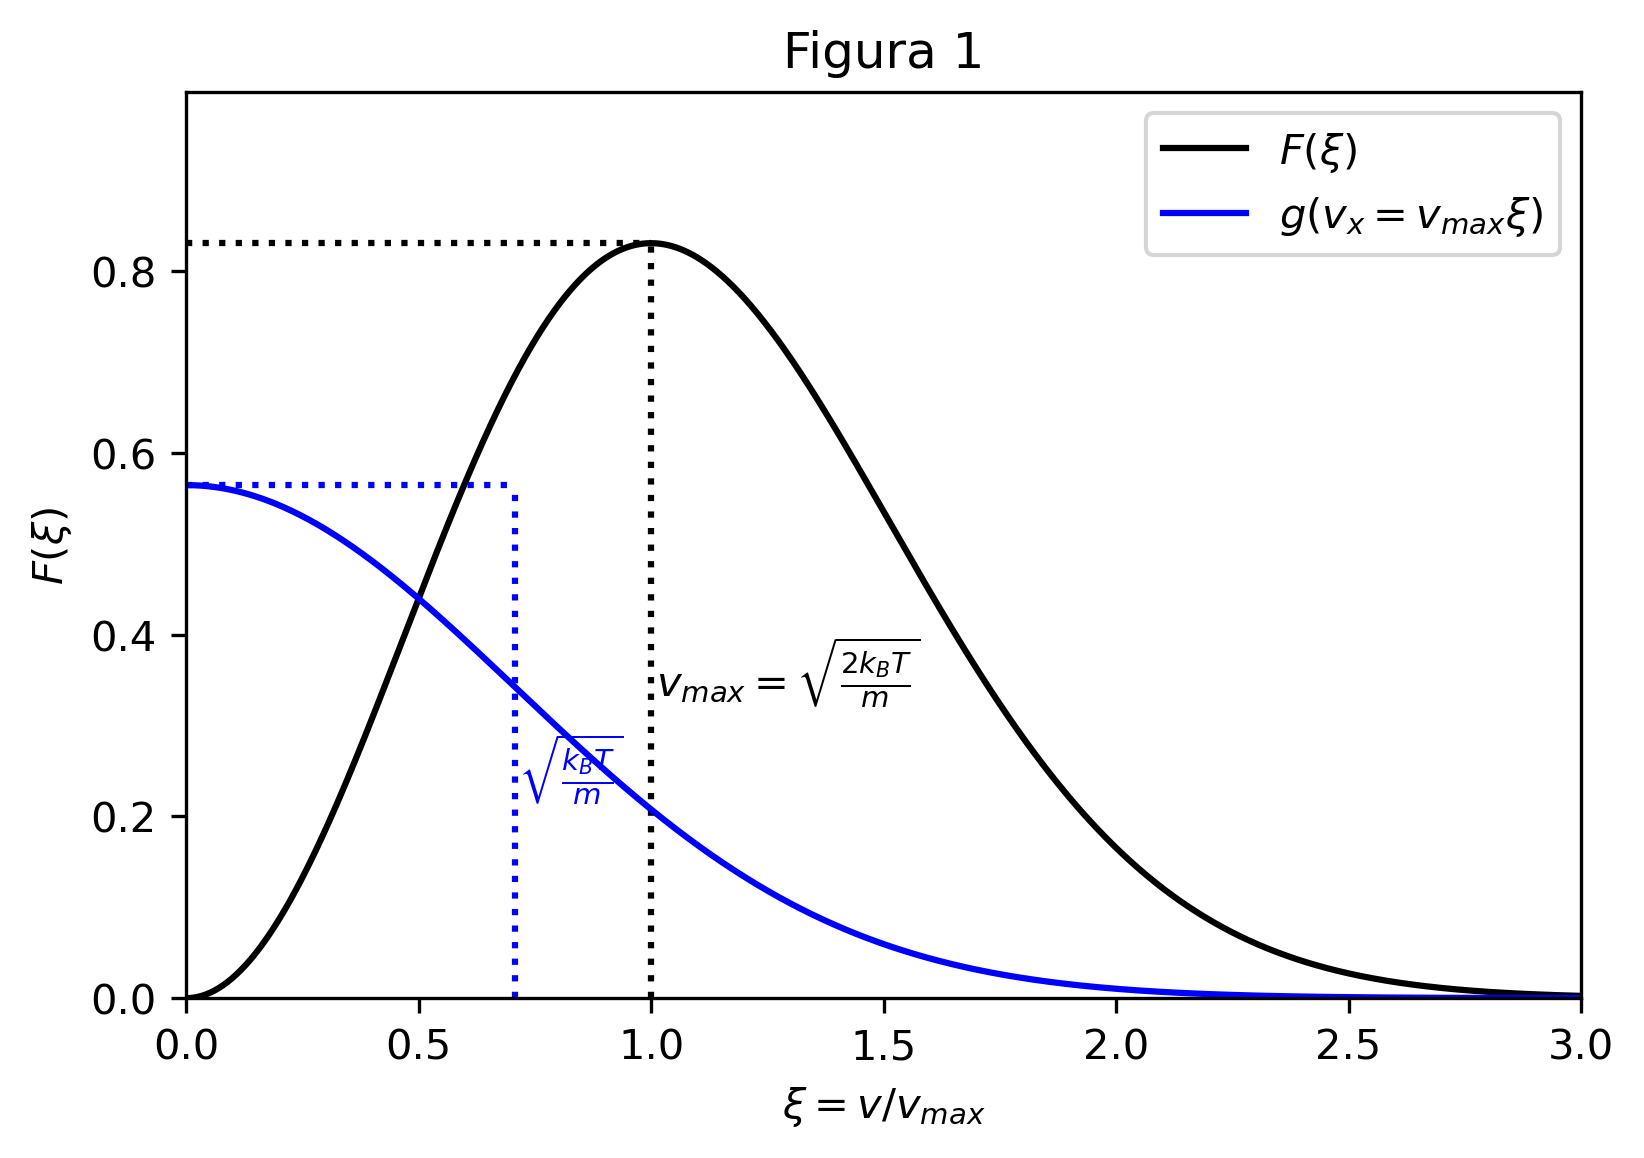

In [6]:
ξ = np.linspace(0, 3, 1000)
Vmax = np.sqrt(2 * cte.Boltzmann * T / m)
Fmax = max(F(ξ))
plt.figure(dpi=300)
plt.plot(ξ, F(ξ), 'k', label=r'$F(\xi)$')
text([0, 1], [0, Fmax], r'$v_{max} = \sqrt{\frac{2k_BT}{m}}$')
plt.plot(ξ, g(ξ*Vmax), 'b', label=r'$g(v_x = v_{max}\xi)$')
text([0, 1/np.sqrt(2)], [0, max(g(ξ*Vmax))], r'$\sqrt{\frac{k_BT}{m}}$', 'blue')
plt.xlim(min(ξ), max(ξ))
plt.ylim(0, 1.2*Fmax)
plt.xlabel(r'$\xi = v / v_{max}$')
plt.ylabel(r'$F(\xi)$')
plt.legend()
_ = plt.title('Figura 1')

## 5. Preguntas de autoexplicación

5.1. Muestre que la velocidad media $\bar{v} = \frac{1}{n}\int_0^\infty {v F(v) dv} = \sqrt{\frac{8k_B T}{\pi m}}$ y la velocidad cuadrática media al cuadrado, $v_{rms}^2 = \frac{1}{n}\int_0^\infty {v^2 F(v) dv} = \frac{3k_BT}{m}$.

5.2. En la Figura 1, identifique el valor esperado de la velocidad, $\bar{v}$ y su valor cuadrático medio, $v_{rms}$, obtenidos con la función de distribución de Maxwell-Boltzmann. ¿A qué se deben las diferencias de estos valores con $v_{max}$?

5.3. En la Figura 1 se muestra la distribución $g(v_x)$ (línea azul), ¿a qué se debe la diferencia observada entre $F(\xi)$ y $g(v_x)$? Sugerencia: compare los valores máximos, posición de los máximos y las formas de las figuras.

5.4. ¿A qué se debe que la distribución de velocidades de Maxwell para la magnitud de la velocidad tenga un comportamiento diferente al gausiano observado en la distribución de Maxwell para las componentes de las velocidades (por ejemplo, $g(v_x)$)? 